<a href="https://colab.research.google.com/github/hatimdeve/python/blob/main/tweets_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tweet classification task where the tweets could be either Politics or Sports. We will use in this classification Many models from Machine learning and deep learning**

1.   ML models:
*   SVM
*   Logistic regression
*   Naive Bayes
2.   DL Models:
*   RNN with Bidirectional LSTM
*   CNN
*   Pre_trained model from tensorflow_hub
*   Hybride model 
>**At the end will choose the best model and use it on the test data to predict tweets type**


In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from time import time

from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,CategoricalNB,GaussianNB,ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
##Bag OF Words
from sklearn.feature_extraction.text import CountVectorizer
import gensim
nltk.download('wordnet')
ps = PorterStemmer()
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **A-Importing dataset and getting familiar with it**

In [3]:
train_data = pd.read_csv("/content/sample_data/train.csv")
test_data = pd.read_csv("/content/sample_data/test.csv")

train_data.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [5]:
train_data['TweetText'].loc[451]

'\'EXCLUSIVE: Allan Border on the 1986 tied Test - "I think the rivalry between India and Australia was born that day." http://t.co/nxTCmeDNvc\''

In [6]:
corpus = []
for i in range(0, len(train_data)):
    review = re.sub('[^a-zA-Z]', ' ', train_data['TweetText'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
#We need to transform the labels from object to uints so we can pass them to our models 
# Politcs = 0
# Sports = 1
y_train = train_data["Label"].apply(lambda x:1 if x=="Sports" else 0)
y_train.head()

0    0
1    0
2    1
3    1
4    1
Name: Label, dtype: int64

In [8]:
X = corpus
y = y_train
X_dev = test_data["TweetText"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## **B-Machine Learning**



### **1- SVM**

In [10]:
model_SVM = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("SVM", SVC())
])
t0 = time()
model_SVM.fit(X_train,y_train)
print(f"\nTraining time: {round(time()-t0, 3)}s")

t0 = time()
score_train_SVM = model_SVM.score(X_train, y_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")

t0 = time()
score_test_SVM = model_SVM.score(X_test, y_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")

print("\nTrain set score:", score_train_SVM)
print("Test set score:", score_test_SVM)


Training time: 4.191s
Prediction time (train): 1.968s
Prediction time (test): 0.536s

Train set score: 1.0
Test set score: 0.9578544061302682


### **2-MultinomialNB**

In [11]:
model_MNB = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("MNB", MultinomialNB())
])
t0 = time()
model_MNB.fit(X_train,y_train)
print(f"\nFitting time: {round(time()-t0, 3)}s")

t0 = time()
score_train_MNB = model_MNB.score(X_train, y_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")

t0 = time()
score_test_MNB = model_MNB.score(X_test, y_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")

print("\nTrain set score:", score_train_MNB)
print("Test set score:", score_test_MNB)


Fitting time: 0.116s
Prediction time (train): 0.078s
Prediction time (test): 0.021s

Train set score: 0.9879310344827587
Test set score: 0.9647509578544061


### **3- BernoulliNB**

In [12]:
model_BNB = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("BNB", BernoulliNB())
])
t0 = time()
model_BNB.fit(X_train,y_train)
print(f"\nFitting time: {round(time()-t0, 3)}s")

t0 = time()
score_train_BNB = model_BNB.score(X_train, y_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")

t0 = time()
score_test_BNB = model_BNB.score(X_test, y_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")

print("\nTrain set score:", score_train_BNB)
print("Test set score:", score_test_BNB)


Fitting time: 0.115s
Prediction time (train): 0.083s
Prediction time (test): 0.022s

Train set score: 0.9804597701149426
Test set score: 0.960919540229885


### **4- ComplementNB**

In [13]:
model_CNB = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("BNB", ComplementNB())
])
t0 = time()
model_CNB.fit(X_train,y_train)
print(f"\nFitting time: {round(time()-t0, 3)}s")

t0 = time()
score_train_CNB = model_CNB.score(X_train, y_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")

t0 = time()
score_test_CNB = model_CNB.score(X_test, y_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")

print("\nTrain set score:", score_train_CNB)
print("Test set score:", score_test_CNB)


Fitting time: 0.125s
Prediction time (train): 0.088s
Prediction time (test): 0.023s

Train set score: 0.9873563218390805
Test set score: 0.9647509578544061


### **5- GaussianNB**

In [14]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5)
features_train = vectorizer.fit_transform(X_train)
features_test = vectorizer.transform(X_test)

In [15]:
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features_train, y_train)
features_train = selector.transform(features_train).toarray()
features_test = selector.transform(features_test).toarray()

In [16]:
model_GNB = GaussianNB()
t0 = time()
model_GNB.fit(features_train,y_train)
print(f"\nFitting time: {round(time()-t0, 3)}s")

t0 = time()
score_train_GNB = model_GNB.score(features_train, y_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")

t0 = time()
score_test_GNB = model_GNB.score(features_test, y_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")

print("\nTrain set score:", score_train_GNB)
print("Test set score:", score_test_GNB)


Fitting time: 0.059s
Prediction time (train): 0.068s
Prediction time (test): 0.011s

Train set score: 0.9534482758620689
Test set score: 0.9348659003831418


### **6- Logistic Regression**

In [17]:
model_LR = LogisticRegression()
t0 = time()
model_LR.fit(features_train, y_train)
print(f"\nTraining time: {round(time()-t0, 3)}s")

t0 = time()
score_train_LR = model_LR.score(features_train, y_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")

t0 = time()
score_test_LR = model_LR.score(features_test, y_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")

print("\nTrain set score:", score_train_LR)
print("Test set score:", score_test_LR)


Training time: 0.402s
Prediction time (train): 0.011s
Prediction time (test): 0.006s

Train set score: 0.9475095785440613
Test set score: 0.9425287356321839


## **C-Deep Learning**

### **Preparing our deep learning models**

1.   Text vectorizer
2.   Embedding



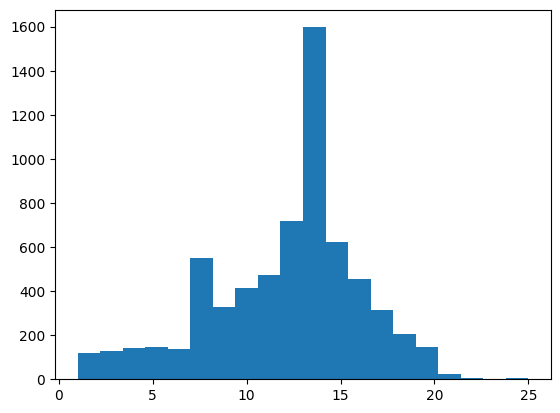

In [18]:
# Finding the best sequence lenght Using histogram and percentile
sent_len = [len(sentence.split()) for sentence in X]
plt.hist(sent_len, bins=20);

In [19]:
len_sen = int(np.percentile(sent_len, 95));
len_sen

18

In [20]:
max_vocabulary = 10000 
text_vectorizer = TextVectorization(max_tokens=max_vocabulary,
                                    output_sequence_length=len_sen
                                    )

text_vectorizer.adapt(X)

In [21]:
text_vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'co', 'http', 'rt']

In [22]:
embedding = Embedding(input_dim=max_vocabulary,
                     output_dim=128,
                     mask_zero=True,
                     input_length= len_sen)

### **Making our data Fatser**
1.   tensor slices
2.   prefetch


In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))


In [24]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### **1- Bidirectional Lstm**

In [25]:
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(528))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs, name="Lstm_model")

model_1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])
model_1.summary()

Model: "Lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 18)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 18, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 1056)             2775168   
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 1057      
                                                                 
Total params: 4,056,225
Trainable params: 4,056,225
Non-

In [26]:
lstm_history = model_1.fit(train_dataset,
                           epochs=5)

Epoch 1/5
164/164 [==============================] - 58s 317ms/step - loss: 0.2692 - accuracy: 0.8937
Epoch 2/5
164/164 [==============================] - 41s 249ms/step - loss: 0.0507 - accuracy: 0.9858
Epoch 3/5
164/164 [==============================] - 43s 260ms/step - loss: 0.0336 - accuracy: 0.9941
Epoch 4/5
164/164 [==============================] - 42s 256ms/step - loss: 0.0240 - accuracy: 0.9952
Epoch 5/5
164/164 [==============================] - 42s 256ms/step - loss: 0.0274 - accuracy: 0.9946


In [27]:
_, train_score_BILSTM = model_1.evaluate(train_dataset)
_, test_score_BILSTM = model_1.evaluate(test_dataset)

print(train_score_BILSTM)
print(test_score_BILSTM)

41/41 [==============================] - 3s 68ms/step - loss: 0.1180 - accuracy: 0.9548
0.9977011680603027
0.9547892808914185


### **2- Pre_trained model from tensor_hub**

In [28]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2", 
                           input_shape=[], 
                           dtype=tf.string, 
                           trainable=True)

In [29]:
model_pre = tf.keras.Sequential()
model_pre.add(hub_layer)
model_pre.add(tf.keras.layers.Dense(1024, activation='relu'))
model_pre.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_pre.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model_pre.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_1 (Dense)             (None, 1024)              52224     
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 48,243,849
Trainable params: 48,243,849
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_Pre_history = model_pre.fit(train_dataset,
                              epochs=10)

Epoch 1/10
164/164 [==============================] - 107s 648ms/step - loss: 0.2910 - accuracy: 0.8791
Epoch 2/10
164/164 [==============================] - 105s 640ms/step - loss: 0.0839 - accuracy: 0.9676
Epoch 3/10
164/164 [==============================] - 105s 638ms/step - loss: 0.0258 - accuracy: 0.9923
Epoch 4/10
164/164 [==============================] - 102s 624ms/step - loss: 0.0072 - accuracy: 0.9981
Epoch 5/10
164/164 [==============================] - 119s 729ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 6/10
164/164 [==============================] - 113s 687ms/step - loss: 8.9054e-04 - accuracy: 1.0000
Epoch 7/10
164/164 [==============================] - 114s 695ms/step - loss: 4.9804e-04 - accuracy: 1.0000
Epoch 8/10
164/164 [==============================] - 114s 696ms/step - loss: 3.2045e-04 - accuracy: 1.0000
Epoch 9/10
164/164 [==============================] - 125s 763ms/step - loss: 2.2326e-04 - accuracy: 1.0000
Epoch 10/10
164/164 [===========================

In [31]:
_, test_score_pre = model_pre.evaluate(test_dataset)

41/41 [==============================] - 5s 108ms/step - loss: 0.2392 - accuracy: 0.9433


## **D- Results**

In [33]:
results = {"models":["SVM","MultinomialNB","BernoulliNB","ComplementNB","GaussianNB","LogisticR","BI_LSTM","Pre_trained"],
           "Score":[score_test_SVM*100,score_test_MNB*100,score_test_BNB*100,score_test_CNB*100,score_test_GNB*100,score_test_LR*100,test_score_BILSTM*100,test_score_pre*100]}
results = pd.DataFrame(results)
results

,models,Score
0,SVM,95.785441
1,MultinomialNB,96.475096
2,BernoulliNB,96.091954
3,ComplementNB,96.475096
4,GaussianNB,93.486590
5,LogisticR,94.252874
6,BI_LSTM,95.478928
7,Pre_trained,94.329500


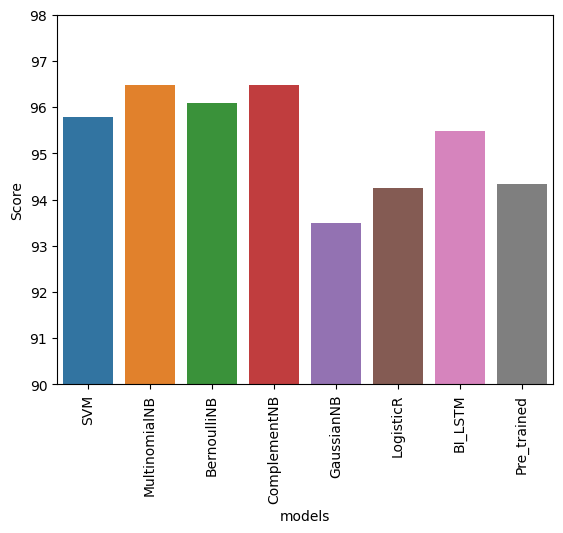

In [35]:
import seaborn as sns
plt.xticks(rotation = 90) 
ax = sns.barplot(x= 'models', y= 'Score', data = results);
ax.axes.set_ylim(90,98);

## **E- Let's improve our best models**

### **1- GridSearchCV**

#### **a- BernouliNB**

In [36]:
param_grid_nb = {
    'alpha': [0.1,0.01,0.5],
    'binarize':[0,0.001,1],
    'fit_prior':[False, True],
}

tf = TfidfVectorizer(max_features=10000)
sms = tf.fit_transform(X_train).toarray()
nbModel_grid = GridSearchCV(estimator=BernoulliNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(sms, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
BernoulliNB(alpha=0.1, binarize=0)


In [37]:
model_BNB = Pipeline([
    ("tfidf", TfidfVectorizer(sublinear_tf=True)),
    ("BNB", BernoulliNB(alpha=0.1, fit_prior=False, binarize=0))
])

model_BNB.fit(X_train,y_train)
BNB_score = model_BNB.score(X_test,y_test)
BNB_score

0.9670498084291188

#### **b- ComplementNB**

In [41]:
param_grid_nb = {
    'alpha': [0.1,0.001,0.01,0.05],
    'norm':[False,True],
    'fit_prior':[False, True],
}


nbModel_grid = GridSearchCV(estimator=ComplementNB(), param_grid=param_grid_nb, verbose=1, cv=3, n_jobs=-1)
nbModel_grid.fit(sms, y_train)
print(nbModel_grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
ComplementNB(alpha=0.1, fit_prior=False)


In [42]:
model_CNB = Pipeline([
    ("tfidf", TfidfVectorizer(sublinear_tf=True, max_df=0.5)),
    ("BNB", ComplementNB(alpha=0.1,fit_prior=False))
])

model_CNB.fit(X_train,y_train)
model_CNB.score(X_test,y_test)

0.9655172413793104

## **F- Predictions**


In [43]:
X_Test_To_Predict = test_data["TweetText"]
X_Test_To_Predict[:3]

0    '28. The home side threaten again through Maso...
1    '@mrbrown @aulia Thx for asking. See http://t....
2    '@Sochi2014 construction along the shores of t...
Name: TweetText, dtype: object

In [44]:
Test_data_Prediction = model_CNB.predict(X_Test_To_Predict)

In [45]:
sample_submission = pd.DataFrame(test_data["TweetId"])
sample_submission["Label"] = Test_data_Prediction

sample_submission.head()

,TweetId,Label
0,306486520121012224,1
1,286353402605228032,0
2,289531046037438464,0
3,306451661403062273,0
4,297941800658812928,0


In [46]:
sample_submission = sample_submission.replace({"Label":{1:"Sports", 0:"Politics"}})
sample_submission.head()

,TweetId,Label
0,306486520121012224,Sports
1,286353402605228032,Politics
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Politics


In [54]:
sample_submission.to_csv("sample_submission.csv", index=False)

In [55]:
sample_submission.Label.value_counts()

Politics    1468
Sports      1142
Name: Label, dtype: int64